Depth Anything V2 

In [48]:
import git
git.Repo.clone_from('https://github.com/DepthAnything/Depth-Anything-V2', 'Depth-Anything-V2')

<git.repo.base.Repo '/home/s5708799/Desktop/24-25/ASE_Project/Depth-Anything-V2/metric_depth/Depth-Anything-V2/.git'>

In [ ]:
%cd Depth-Anything-V2
%pip install -r requirements.txt

Below Code requires donwloading the checkpoints first to run

In [ ]:
import cv2
import torch

from depth_anything_v2.dpt import DepthAnythingV2

DEVICE = 'cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu'

model_configs = {
    'vits': {'encoder': 'vits', 'features': 64, 'out_channels': [48, 96, 192, 384]},
    'vitb': {'encoder': 'vitb', 'features': 128, 'out_channels': [96, 192, 384, 768]},
    'vitl': {'encoder': 'vitl', 'features': 256, 'out_channels': [256, 512, 1024, 1024]},
    'vitg': {'encoder': 'vitg', 'features': 384, 'out_channels': [1536, 1536, 1536, 1536]}
}

encoder = 'vitl' # or 'vits', 'vitb', 'vitg'

model = DepthAnythingV2(**model_configs[encoder])
model.load_state_dict(torch.load(f'checkpoints/depth_anything_v2_{encoder}.pth', map_location='cpu'))
model = model.to(DEVICE).eval()

raw_img = cv2.imread('Test_Images/oppen.png')
depth = model.infer_image(raw_img) # HxW raw depth map in numpy
print(depth)

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
# Load the .npy file
# depth_map = np.load('Test_Images/oppen_raw_depth_meter.npy')
# print(depth_map)
plt.imshow(depth, cmap='inferno')  # You can use 'gray', 'hot', 'viridis', etc.
plt.colorbar(label='Depth Value in meters')
plt.title('Depth Map Visualization')
plt.show()

Required Additional modules

In [ ]:
%pip install transformers
%pip install Ipywidgets
%pip install matplotlib
%pip install pickleshare

Pre-trained model code and heat map visualisation

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


<PIL.Image.Image image mode=L size=3024x4032 at 0x7FBEB435D940>


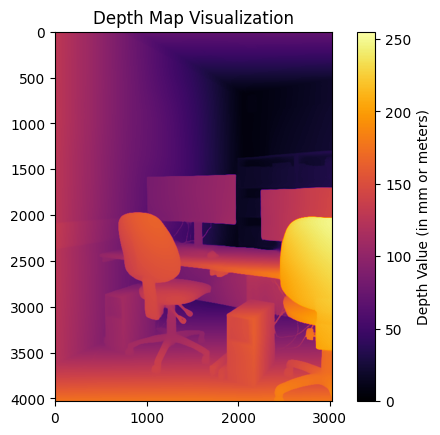

In [62]:
from transformers import pipeline
from PIL import Image
import matplotlib.pyplot as plt

pipe = pipeline(task="depth-estimation", model="depth-anything/Depth-Anything-V2-Large-hf")
image = Image.open('Test_Images/class.jpeg')
depth = pipe(image)["depth"]
print (depth)
plt.imshow(depth, cmap='inferno')  # You can use different colormaps like 'gray' or 'hot'
plt.colorbar(label='Depth Value (in mm or meters)')
plt.title('Depth Map Visualization')
plt.show()


Ready Code to run metric_depth on a video

In [ ]:
%python run_video.py \
  --encoder <vits | vitb | vitl | vitg> \
  --video-path assets/examples_video --outdir video_depth_vis \
  [--input-size <size>] [--pred-only] [--grayscale]

Ready Code to run metric_depth on an image

In [ ]:
%python run.py   --encoder vitl   --load-from checkpoints/depth_anything_v2_metric_vkitti_vitl.pth   --max-depth 80   --img-path 'Test_Images/oppen.png' --outdir 'Test_Images/' --input-size 256  --save-numpy

[[2.8775659 2.8770869 2.876608  ... 3.977445  3.9759612 3.9744778]
 [2.8723173 2.8723514 2.8723855 ... 3.976205  3.9753885 3.974572 ]
 [2.8670685 2.8676157 2.8681629 ... 3.9749653 3.9748156 3.974666 ]
 ...
 [2.3183575 2.315531  2.3127048 ... 2.203141  2.183376  2.1636117]
 [2.3201363 2.316774  2.3134115 ... 2.2097776 2.1925154 2.1752532]
 [2.3219151 2.3180165 2.3141181 ... 2.2164142 2.2016544 2.1868947]]


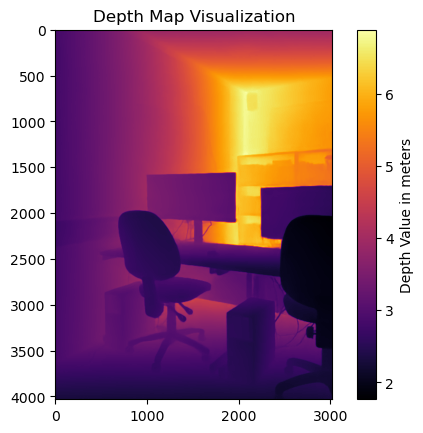

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# Load the .npy file
depth_map = np.load('metric_depth/output/class_raw_depth_meter.npy')
print(depth_map)
plt.imshow(depth_map, cmap='inferno')  # You can use 'gray', 'hot', 'viridis', etc.
plt.colorbar(label='Depth Value in meters')
plt.title('Depth Map Visualization')
plt.show()

Using opencv on numpy depth file

In [26]:
import numpy as np

# Load the depth map from a .npy file
depth_map = np.load('metric_depth/output/oppen_raw_depth_meter.npy')
color_image = cv2.imread('metric_depth/Test_Images/oppen.png')  # BGR format
d_min = 0   # Minimum depth value
d_max = 4  # Maximum depth value



In [27]:
mask = (depth_map >= d_min) & (depth_map <= d_max)
# Create a 3-channel mask for the color image
mask_3channel = np.stack((mask,) * 3, axis=-1)

# Apply the mask: keep original colors where the mask is True, set others to black
filtered_color_image = np.where(mask_3channel, color_image, 0)
# Save the filtered color image
cv2.imwrite('filtered_oppen_image.png', filtered_color_image)



True

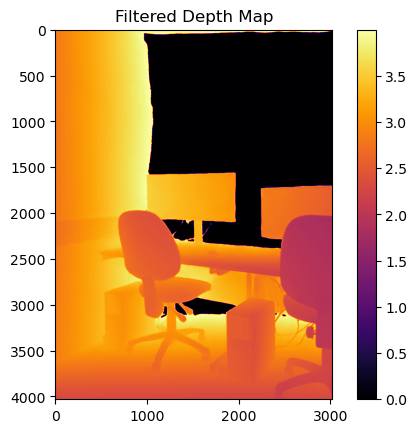

True

In [22]:
import matplotlib.pyplot as plt
import cv2

# Save the filtered depth map
np.save('filtered_depth.npy', filtered_depth)

# Visualize the depth map
plt.imshow(filtered_depth, cmap='inferno')
plt.title('Filtered Depth Map')
plt.colorbar()
plt.show()

# Optionally, save as an image file using OpenCV
cv2.imwrite('filtered_depth.png', filtered_depth)


In [ ]:
import cv2

# Load two images of the same size
image1 = cv2.imread('metric_depth/Test_Images/coco.png') 
image2 = cv2.imread('metric_depth/Test_Images/venom.png') 

# Blend images using weights
alpha = 0.7  # Weight for image1
beta = 0.3   # Weight for image2
blended = cv2.addWeighted(image1, alpha, image2, beta, 0)

# Show blended image
cv2.imshow("Blended Image", blended)
cv2.waitKey(0)
cv2.destroyAllWindows()
